In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [3]:
# Load the dataset
data =pd.read_csv("B:\\cancer informatics\\Hackbio\\idh task\\filtered_data.csv", index_col=0)

# Display the first few rows of the dataset
print(data.head())

                              cg05058263  cg27444789  cg13860548  cg09123484  \
TCGA-E1-A7YQ-01A-11D-A34K-05    0.030197    0.044625    0.027088    0.047863   
TCGA-S9-A7QW-01A-11D-A34D-05    0.033791    0.037649    0.023645    0.043936   
TCGA-HT-7874-01A-11D-2399-05    0.035841    0.049084    0.034282    0.046438   
TCGA-FG-A4MU-01B-11D-A28N-05    0.032398    0.047664    0.026644    0.043522   
TCGA-DU-8162-01A-21D-2254-05    0.039617    0.047446    0.034729    0.032791   

                              cg18192808  cg01002125  cg13390004  cg24675056  \
TCGA-E1-A7YQ-01A-11D-A34K-05    0.025605    0.047291    0.048029    0.041328   
TCGA-S9-A7QW-01A-11D-A34D-05    0.020432    0.044334    0.034376    0.031684   
TCGA-HT-7874-01A-11D-2399-05    0.020672    0.066266    0.041378    0.064245   
TCGA-FG-A4MU-01B-11D-A28N-05    0.023011    0.079243    0.056092    0.053872   
TCGA-DU-8162-01A-21D-2254-05    0.022976    0.046720    0.057768    0.040871   

                              cg150366

In [4]:
# Data Preprocessing
X = data.drop(['IDH_status', 'LGM_stage'], axis=1)

In [5]:
# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [6]:
# Determine optimal number of clusters using the Elbow Method
inertia = []
k_range = range(1, 11)  # Test for 1 to 10 clusters

In [7]:
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are les

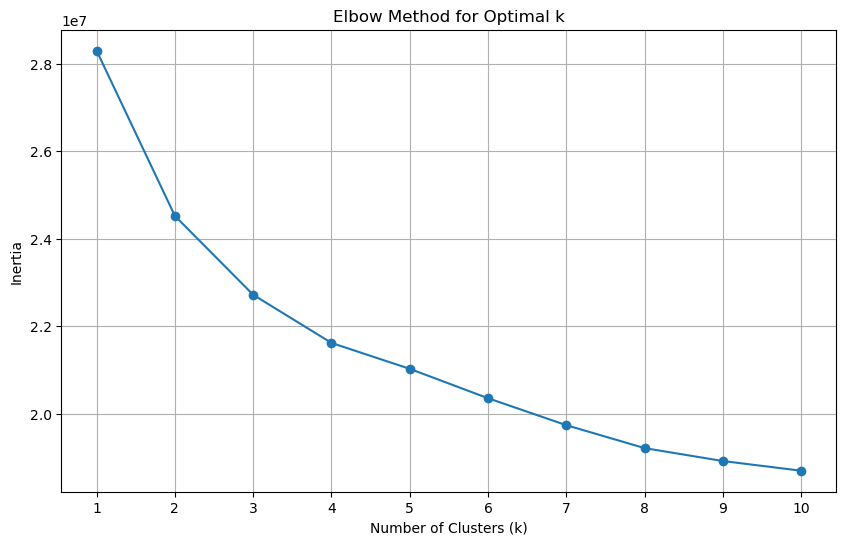

In [8]:
# Plotting the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.grid()
plt.show()
# print("k_range length:", len(k_range))
# print("inertia length:", len(inertia))

In [9]:
# Choose optimal k
optimal_k = 3 # based on the elbow plot

# Fit K-Means with optimal k
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to the original dataframe
data['Cluster'] = clusters

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


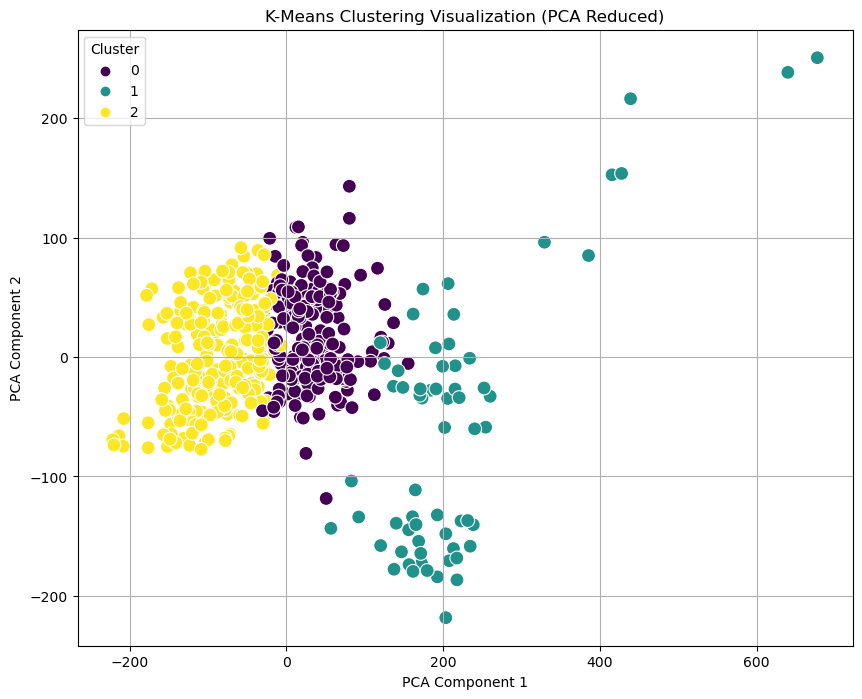

In [10]:
# Visualize clusters using PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=data['Cluster'], palette='viridis', s=100)
plt.title('K-Means Clustering Visualization (PCA Reduced)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.grid()
plt.show()

In [11]:

# Optionally, analyze cluster characteristics by grouping with IDH status and LGG status
cluster_analysis = data.groupby(['Cluster', 'IDH_status', 'LGM_stage']).size().unstack(fill_value=0)
print("\nCluster Analysis by IDH and LGG Status:")
print(cluster_analysis)


Cluster Analysis by IDH and LGG Status:
LGM_stage           LGm1  LGm2  LGm3  LGm4  LGm5  LGm6
Cluster IDH_status                                    
0       Mutant        19    93    58     0     0     0
        WT             0     0     0     9    17    12
1       Mutant         6    30    12     0     0     1
        WT             0     0     0     2     7     5
2       Mutant        20   127    53     0     0     0
        WT             0     0     0    12    21     9
